# Laboratorio Estadística Computacional

    - Pablo Mera K. 201773028-5
    - Paula Pérez M. 201603022-0
    - Anghelo Carvajal C. 201473062-4

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Actividad 1 Demostración experimental

### Pregunta 1:

0.0
0.0
0.029
0.0284
0.02727
0.027861
0.0278242
0.02778729


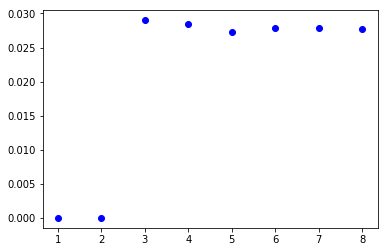

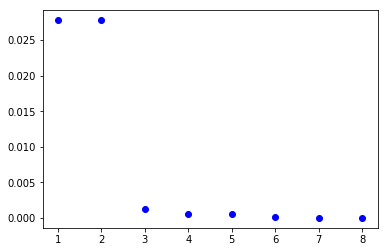

In [2]:
dado = [1,2,3,4,5,6]                                                            #Lista con los numeros de un dado
probexp= []                                                                     #Lista vacia para guardar las probabilidades
error=[]                                                                        #Lista vacia para guardar los errores                                              
rep = [1,2,3,4,5,6,7,8]                                                           #Lista Con los ordenes de magnitud para efectuar la simulacion

for n in rep:                                                                   #Iteracion Para cada orden de magnitud
    contador=0                                                                  #Contador que registra los pares de 6
    for i in range(10**n):                                                      #Iteracion por lanzamiento de dados
        aux=np.random.choice(dado,2)                                            #Escojer un numero al azar de la lista dados, 2 veces
        if list(aux) == [6,6]:                                                  #Si es par de 6, sumar 1 al contador
            contador+=1
    print(float(contador)/10**n)                                                
    probexp.append(float(contador)/10**n)                                       #Agregar resultado de la frecuencia
    error.append(abs(float(contador)/10**n - 1/36))                             #Agregar resultado de el error
 
plt.plot(rep,probexp,'bo')                                                      #Graficar las frecuencias
plt.show()
plt.plot(rep,error,'bo')                                                        #Graficar los errores
plt.show()



### Pregunta 2:
 - Si se tiene una infinita cantidad de muestras es posible generar una tendencia que sea altamente representativa para un suceso determinado.
 - Sería muy poco probable que no apareciera ningún par de 6 en toda la simulación, pero si esto sucediera habría una diferencia entre la probabilidad teórica y la experimental, lo que generaría una alteración en la distribución de los datos.
 - La probabilidad teórica y experimental son muy cercanas, por lo tanto, como el error es mínimo en este caso el supuesto se cumple.

### Pregunta 3:

#### Parte 1:

In [3]:
cont = 0                                                                        #Contador para las iteraciones que cumplen las condiciones
for j in range(10**6):                                                          #iterar un millon de veces, para asegurar un buen resultado
    aux=np.random.choice(dado,5)                                                #Escojer un numero al azar de la lista dados, 5 veces
    caux1 = 0                                                                   #Variable para guardar cantidad de pares 
    caux2 = 0                                                                   #Variable para ver si hay escala
    for i in list(np.bincount(aux)):                                            #Se aplica bincount a la lista, y se itera en el resultado
        if i == 2:                                                              #si hay un par se suma uno al contador de pares
            caux1+=1
        elif i == 3:                                                            #si hay un trio se marca la variable de trios
            caux2+=1
        elif i == 4:                                                            #Si hay 4 iguales, se suma 2 al contador de pares
            caux=2
        elif i == 5:                                                            #Si hay 5 iguales, se marca el trio y se suma un par
            caux1=1
            caux2=1
        
    if (caux1 == caux2 == 1)or(caux1 == 2)or((caux1 == caux2 == 0)
            and (not(1 in aux) or not(6 in aux))) :                             #Luego se evaluan las condiciones, par y trio, 2 pares, y escala donde ambos son 0(Se concidera escala que da vuelta)
       cont+=1
       
print (cont/10**6)

0.318944
0.24371
0.088235


#### Parte 2 y 3:

In [13]:
dado = [1,2,3,4,5,6] 
primos = [11,13,17,19,23,29,31,37,41,43,47,53,59]                               #Lista con los primos entre 10 y 60
perfect = [16,25,36,49]                                                         #Lista con los cuadrados perfectos entre 10 y 60
cont1 = 0                                                                       #Contador para primos
cont2 = 0                                                                       #Contador para cuadrados perfectos
for i in range(10**6):
    aux=np.random.choice(dado,10)                                               #Escojer un numero al azar de la lista dados, 10 veces
    if sum(aux) in primos:                                                      #aumentar cont1 si la suma de los dados escojidos se encuntra en la lista primos 
        cont1+=1    
    if sum(aux) in perfect:                                                     #aumentar cont2 si la suma de los dados escojidos se encuntra en la lista de cuadrados perfectos
        cont2+=1
print (cont1/10**6)
print (cont2/10**6)

0.244138
0.088392


### Actividad 2 - Heart Disease UCI 

### Pregunta 1:


$P(A \cap B)= P(A)P(B|A)$

$P(A \cap B)= P(B)P(A|B)$

$P(B)P(A|B)=P(A)P(B|A)$

$P(A|B)= \frac{P(A)P(B|A)}{P(B)}$

#### Demostración simlificación del teorema:

$P(y)P(x_1,...,X_n|y)$

$P(y)P(x_1|y)P(x_2,...,x_n|y, x_i)$

$P(y)P(x_1|y)P(x_2|y, x_1) P(x_3,...,x_n|y, x_1, x_2)$

##### Y así sucesivamente... luego por independencia:

$P(x_2|y, x_1) = P(x_2|y)$


##### Finalmente se llega a la expresión:

$P(y)P(x_1|y)P(x_2|y)P(x_3|y)...P(x_n|y)$

$P(y) \Pi_{i=1}^{n} P(x_i|y)$

##### Luego reemplazando en Bayes:

$P(y|x_1,...,x_n) = P(y) \Pi_{i=1}^{n} \frac{P(x_i|y)}{P(x_1,..., x_n}$


### Pregunta 2

In [5]:
dataset = pd.read_csv("LEC2_dataset.csv")

 - Defina su priori o creencia inicial, explique en que se bas ́o para utilizar esta probabilidad.

In [14]:
infartos = dataset["target"]                                                    #se extrae los datos de casos de infarto
prob_infarto = sum(infartos) / len(infartos)                                    #Ya que estos vienen en 1 o 0, solo es necesario sumarlos todos, y luego dividirlo en su largo
print("P(infarto = si) = " +str(prob_infarto))                                       #Obteniendo asi la probabilidad inicial de que de un infarto
                        
prob_A = prob_infarto                                                           #Variable para guardad la priori

P(infarto = si) = 0.5445544554455446


 - Escriba la expresión simplificada denaive bayespara este caso particular.
 
$P(infarto | sexo, edad, dolorPecho, presionSanguinea) = P(infarto) * \frac{P(sexo, edad, dolorPecho, presionSanguinea | infarto)}{P(sexo, edad, dolorPecho, presionSanguinea)}$


 - Utilizandosolo las personas del hospital 1, calcule la probabilidad de cada caracter ́ısticaxisea igual a la del paciente.

In [15]:
paciente = ["f","40's","atypical angina","<=120"]

hospital1 = dataset[dataset["hospital"] == 1]                                   #Se filtran los datos del primer hospital                             
sexo = hospital1[hospital1["sex"]  == paciente[0]]   
edad = hospital1[hospital1["age_range"]  == paciente[1]]
dolor = hospital1[hospital1["cp"]  == paciente[2]]  
presion = hospital1[hospital1["fbs"]  == paciente[3]]    
                                                  
prob_sexo = len(sexo) / len(hospital1)                                           #Se toma el total de mujeres y se divide en el total de pacientes
print("P(sexo = "+ paciente[0] +") = "+str(prob_sexo))                                          #Obteniendo la probabilidad de que un paciente se mujer

prob_edad = len(edad) / len(hospital1)                                           #Se toma la cantidad de pacientes con edad = 40, y se divide con el total de pacientes
print("P(edad = "+ paciente[1] +") = "+str(prob_edad))                         #Obteniendo asi la probabilidad de que un paciente tenga 40 anos

prob_dolor = len(dolor) / len(hospital1)                                       #Se toma el total de personas con cp = atypical angina y se divide con el total de pacientes 
print("P(cp = "+ paciente[2] +") = "+ str(prob_dolor))                         #Obteniendo asi la probabilidad de que un paciente tenga el dolor de atypical angina
                                                                                 #Se toma la columna fbs
prob_presion = len(presion) / len(hospital1)                                   #Se toma el total de personas con fbs <= 120 y se divide con el total de pacientes 
print("P(fbs "+ paciente[3] +") = "+str(prob_presion))                         #Obteniendo asi la probabilidad de que un paciente tenga fbs <= 120

prob_B = prob_sexo * prob_edad * prob_dolor * prob_presion                     #Variable para guardar la constante de normalizacion
print(prob_B)

P(sexo = f) = 0.32673267326732675
P(edad = 40's) = 0.19801980198019803
P(cp = atypical angina) = 0.16831683168316833
P(fbs <=120) = 0.8811881188118812
0.009596157523936508


 - Utilizando solo las personas del hospital 1, calcule la probabilidad condicional de cada carac-ter ́ısticaxisea igual a la del paciente dado que sufri ́o un ataque

In [16]:
cantInfarto1 = len(hospital1[(hospital1["target"] == 1)])

prob_sexo_target1 = len(sexo[sexo["target"] == 1]) / cantInfarto1
print("P(sexo = "+ paciente[0] +"|infarto) = "+str(prob_sexo_target1))

prob_edad_target1 = len(edad[edad["target"] == 1]) / cantInfarto1
print("P(edad = "+ paciente[1] +"|infarto) = "+str(prob_edad_target1))

prob_dolor_target1 = len(dolor[dolor["target"] == 1]) / cantInfarto1
print("P(dolor = "+ paciente[2] +"|infarto) = "+str(prob_dolor_target1))

prob_presion_target1 = len(presion[presion["target"] == 1]) / cantInfarto1
print("P(presion "+ paciente[3] +"|infarto) = "+str(prob_presion_target1))

prob_B_A = prob_sexo_target1 * prob_edad_target1 * prob_dolor_target1 * prob_presion_target1
print(prob_B_A)

P(sexo = f|infarto) = 0.4339622641509434
P(edad = 40's|infarto) = 0.20754716981132076
P(dolor = atypical angina|infarto) = 0.2641509433962264
P(presion <=120|infarto) = 0.9056603773584906
0.021546975399852054


 - Utilice sus resultados para evaluar la expresi ́on denaive bayesy obtener su posteriori, ¿Cu ́al esla probabilidad de sufrir un ataque seg ́un la primera evidencia (hospital 1)?

In [17]:
prob_A_B = prob_A * prob_B_A / prob_B
print(prob_A_B)

1.2227291419609478


### Pregunta 3

Utilizando la probabilidad obtenida como nueva priori, iterativamente actualice su priori calculando suposteriori usando las personas de cada hospital. Muestre con un gr ́afico como cambia la probabilidadcada vez que utiliza nuevos datos. ¿Cu ́al es su probabilidad final?

Text(0.5, 0, 'Cantidad de Hospitales')

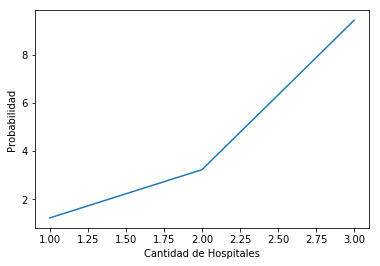

In [18]:
probHospitales=[]
for i in [1,2,3]:
    
    hospital = dataset[dataset["hospital"] == i]                             
    sexo = hospital[hospital["sex"]  == paciente[0]]   
    edad = hospital[hospital["age_range"]  == paciente[1]]
    dolor = hospital[hospital["cp"]  == paciente[2]]  
    presion = hospital[hospital["fbs"]  == paciente[3]]

    prob_sexo = len(sexo) / len(hospital)          
    prob_edad = len(edad) / len(hospital)                                         #Se toma la cantidad de pacientes con edad = 40, y se divide con el total de pacientes
    prob_dolor = len(dolor) / len(hospital)                                       #Se toma el total de personas con cp = atypical angina y se divide con el total de pacientes 
    prob_presion = len(presion) / len(hospital)
    
    prob_B = prob_sexo * prob_edad * prob_dolor * prob_presion                    #Variable para guardar la constante de normalizacion

    cantInfarto = len(hospital[(hospital["target"] == 1)])

    prob_sexo_target1 = len(sexo[sexo["target"] == 1]) / cantInfarto
    prob_edad_target1 = len(edad[edad["target"] == 1]) / cantInfarto
    prob_dolor_target1 = len(dolor[dolor["target"] == 1]) / cantInfarto
    prob_presion_target1 = len(presion[presion["target"] == 1]) / cantInfarto
    prob_B_A = prob_sexo_target1 * prob_edad_target1 * prob_dolor_target1 * prob_presion_target1

    prob_A_B = prob_A * prob_B_A / prob_B
    probHospitales.append(prob_A_B)
    prob_A = prob_A_B

plt.plot([1,2,3],probHospitales)
plt.ylabel("Probabilidad")
plt.xlabel("Cantidad de Hospitales")

### Pregunta 4

Utilizando  su  priori  inicial,  calcule  nuevamente  su  posteriori  utilizando  todo  el  dataset  (todos  loshospitales juntos). ¿Es diferente la probabilidad obtenida? ¿A que se debe su resultado?

In [19]:
prob_A = prob_infarto
hospital = dataset                          
sexo = hospital[hospital["sex"]  == paciente[0]]   
edad = hospital[hospital["age_range"]  == paciente[1]]
dolor = hospital[hospital["cp"]  == paciente[2]]  
presion = hospital[hospital["fbs"]  == paciente[3]]

prob_sexo = len(sexo) / len(hospital)          
prob_edad = len(edad) / len(hospital)                                         
prob_dolor = len(dolor) / len(hospital)                                       
prob_presion = len(presion) / len(hospital)

prob_B = prob_sexo * prob_edad * prob_dolor * prob_presion                     

cantInfarto = len(hospital[(hospital["target"] == 1)])

prob_sexo_target1 = len(sexo[sexo["target"] == 1]) / cantInfarto
prob_edad_target1 = len(edad[edad["target"] == 1]) / cantInfarto
prob_dolor_target1 = len(dolor[dolor["target"] == 1]) / cantInfarto
prob_presion_target1 = len(presion[presion["target"] == 1]) / cantInfarto
prob_B_A = prob_sexo_target1 * prob_edad_target1 * prob_dolor_target1 * prob_presion_target1

prob_A_B = prob_A * prob_B_A / prob_B
print(prob_A_B)

1.4556511739536437


Es diferente, por que en el primer caso se reemplaza la probabilidad inicial en cada iteracion,  mejorando así el supuesto en cada iteracion, mientras que en el segundo caso el supuesto inicial es totalmente arbitrario.